<a href="https://colab.research.google.com/github/ary3120-droid/myproject/blob/main/star0205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0. 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from google.colab import drive


drive.mount('/content/drive')

path = '/content/drive/MyDrive/star/'

portfolio = pd.read_json(path + 'portfolio.json', orient='records', lines=True)
profile = pd.read_json(path + 'profile.json', orient='records', lines=True)
transcript = pd.read_json(path + 'transcript.json', orient='records', lines=True)

print("데이터 로딩 성공!")
print(f"Portfolio: {portfolio.shape}, Profile: {profile.shape}, Transcript: {transcript.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
데이터 로딩 성공!
Portfolio: (10, 6), Profile: (17000, 5), Transcript: (306534, 4)


In [2]:
# 1. 한글 폰트 설치 (나눔바른고딕)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 2. 실행 후 [런타임 다시 시작] 을 눌러주세요!

# 3. 런타임 재시작 후 아래 코드로 설정 적용
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
# 1. Portfolio (쿠폰 정보) 확인
print("--- Portfolio 데이터 (상위 5개) ---")
display(portfolio.head())

# 2. Profile (고객 정보) 확인
# 나이 118세가 NaN, 날짜 형식이 변환 확인
print("\n--- Profile 데이터 (상위 5개) ---")
display(profile.head())

# 3. Transcript (행동 로그) 확인
# 파싱된 offer_id, amount, reward_received 컬럼이 잘 생성되었는지 확인하세요.
print("\n--- Transcript 데이터 (상위 5개) ---")
display(transcript.head())

# 추가: 데이터 타입 및 결측치 요약 정보 확인
print("\n--- 데이터 요약 정보 ---")
print(profile.info())

--- Portfolio 데이터 (상위 5개) ---


,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7



--- Profile 데이터 (상위 5개) ---


,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN



--- Transcript 데이터 (상위 5개) ---


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0



--- 데이터 요약 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB
None


##1. 전처리

In [12]:
# 1. Profile 데이터 정제
# 118세는 결측치이므로 NaN으로 처리
profile['age'] = profile['age'].replace(118, np.nan)

# 가입일자를 날짜 형식으로 변환
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

# 2. Transcript 데이터 정제 (value 컬럼 풀기)
# offer_id, amount, reward를 추출하여 새로운 컬럼 생성
transcript['offer_id'] = transcript['value'].apply(lambda x: x.get('offer_id') or x.get('offer id'))
transcript['amount'] = transcript['value'].apply(lambda x: x.get('amount', 0))
transcript['reward'] = transcript['value'].apply(lambda x: x.get('reward', 0))

# 불필요해진 value 컬럼 삭제
df_log = transcript.drop('value', axis=1)
#-------------------------------------------------------------
# 3. 분석을 위한 시간 데이터 변환
# 스타벅스 데이터의 'time'은 가입 시점으로부터의 경과 시간(hours)인 경우가 많다.
# 기준 날짜를 설정하여 'datetime' 형식으로 변환해야 코호트 분석이 가능하다.
base_date = pd.Timestamp('2026-01-01') # 임의의 기준일 설정
df_log['date'] = base_date + pd.to_timedelta(df_log['time'], unit='h')

# 4. 코호트 분석용 월 단위 컬럼 생성
df_log['OrderMonth'] = df_log['date'].dt.to_period('M')

# 5. 고객별 '첫 활동일' 정보 결합
# profile의 가입일(became_member_on)을 기준으로 코호트를 설정한다.
df_log = pd.merge(df_log, profile[['id', 'became_member_on']], left_on='person', right_on='id', how='left')
df_log['CohortMonth'] = df_log['became_member_on'].dt.to_period('M')

print("전처리 완료! 'df_log' 데이터프레임이 준비되었습니다.")

전처리 완료! 'df_log' 데이터프레임이 준비되었습니다.


##2. 서비스 현황 파악 (EDA)

총 매출: $1,775,452
총 고객 수: 17,000명
고객당 평균 결제액: $104.44


/tmp/ipython-input-1187624545.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_log, x='event', palette='viridis', order=df_log['event'].value_counts().index)


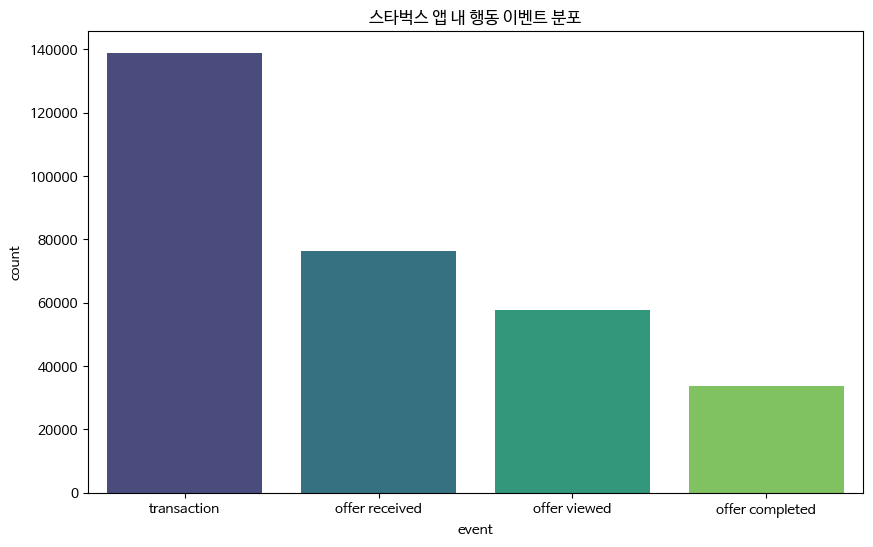

In [5]:
# 1. 주요 지표 요약
total_revenue = df_log['amount'].sum()
unique_users = profile['id'].nunique()
avg_revenue_per_user = total_revenue / unique_users

print(f"총 매출: ${total_revenue:,.0f}")
print(f"총 고객 수: {unique_users:,}명")
print(f"고객당 평균 결제액: ${avg_revenue_per_user:.2f}")

# 2. 이벤트 발생 빈도 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df_log, x='event', palette='viridis', order=df_log['event'].value_counts().index)
plt.title('스타벅스 앱 내 행동 이벤트 분포')
plt.show()

##3. 고객 세분화 (RFM + Clustering)

1. RFM 지표 계산 및 점수 부여

먼저 각 고객별로 Recency, Frequency, Monetary 값을 구한 뒤, 이를 1~5점 사이의 점수로 변환

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 실제 결제(transaction) 데이터만 필터링
df_transactions = df_log[df_log['event'] == 'transaction'].copy()

# 2. RFM 계산을 위한 기준 시점 (데이터의 마지막 시간)
max_time = df_log['time'].max()

# 3. 고객별 RFM 산출
rfm = df_transactions.groupby('person').agg({
    'time': lambda x: max_time - x.max(),  # Recency: 마지막 구매 후 경과 시간 (낮을수록 좋음)
    'event': 'count',                      # Frequency: 구매 횟수 (높을수록 좋음)
    'amount': 'sum'                        # Monetary: 총 구매 금액 (높을수록 좋음)
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

# 4. 점수 부여 (qcut을 이용해 5등분)
# Recency는 낮을수록 좋은 점수(5점)를 줍니다.
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
# Frequency와 Monetary는 높을수록 좋은 점수(5점)를 줍니다.
# (중복 값이 많을 경우 rank(method='first')를 활용)
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# RFM 총점 계산
rfm['RFM_Score'] = rfm['R_score'].astype(int) + rfm['F_score'].astype(int) + rfm['M_score'].astype(int)

print("RFM 점수 산정 완료")
display(rfm.head())

RFM 점수 산정 완료


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
person,,,,,,,
0009655768c64bdeb2e877511632db8f,18,8,127.60,5,3,4,12
00116118485d4dfda04fdbaba9a87b5c,240,3,4.09,1,1,1,3
0011e0d4e6b944f998e987f904e8c1e5,60,5,79.46,3,2,3,8
0020c2b971eb4e9188eac86d93036a77,6,8,196.86,5,3,5,13
0020ccbbb6d84e358d3414a3ff76cffd,42,12,154.05,4,4,4,12


Recency (최근성): 마지막 구매일로부터 경과한 시간입니다. 값이 작을수록 최근에 구매했음을 의미합니다.

Frequency (빈도): 일정 기간 동안의 구매 횟수입니다. 값이 클수록 자주 방문한 고객입니다.

Monetary (금액): 구매한 총 금액입니다. 값이 클수록 매출 기여도가 높은 고객입니다.

Score (R/F/M 점수): 각 지표를 등급화(보통 1~5점)한 것으로, RFM_Score는 이 점수들의 합계입니다.

2. K-Means 군집화 (Clustering)

단순 점수 합계보다 더 정교한 분류를 위해 머신러닝 알고리즘인 K-Means를 적용

In [8]:
# 1. 군집화에 사용할 데이터 준비 (R, F, M 점수 기준)
X = rfm[['R_score', 'F_score', 'M_score']]

# 2. 데이터 표준화 (K-Means는 거리를 기반으로 하므로 스케일링이 중요합니다)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. K-Means 모델 생성 및 학습 (3개 그룹으로 우선 분류)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

# 4. 군집별 특징 확인
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM_Score': 'mean'
}).reset_index()

print("군집별 평균 지표")
display(cluster_summary)

군집별 평균 지표


,Cluster,Recency,Frequency,Monetary,RFM_Score
0,0,168.564825,4.577790,49.253749,5.491357
1,1,53.229718,12.452607,184.982554,11.940480
2,2,33.612935,6.186918,45.629270,8.641352


3. 결과 시각화

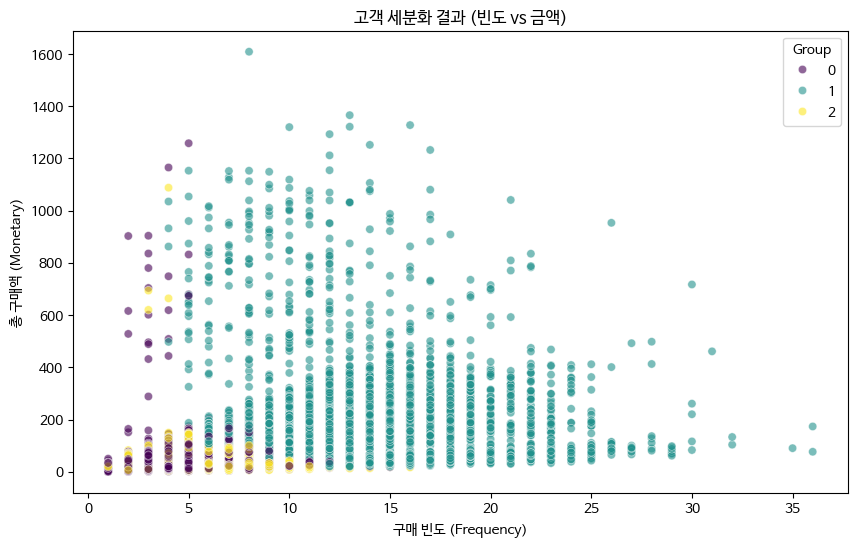

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('고객 세분화 결과 (빈도 vs 금액)')
plt.xlabel('구매 빈도 (Frequency)')
plt.ylabel('총 구매액 (Monetary)')
plt.legend(title='Group')
plt.show()

##4. 코호트 & 퍼널 분석 (Flow 중심)

코호트 분석 (가입 월 기준 유지율)

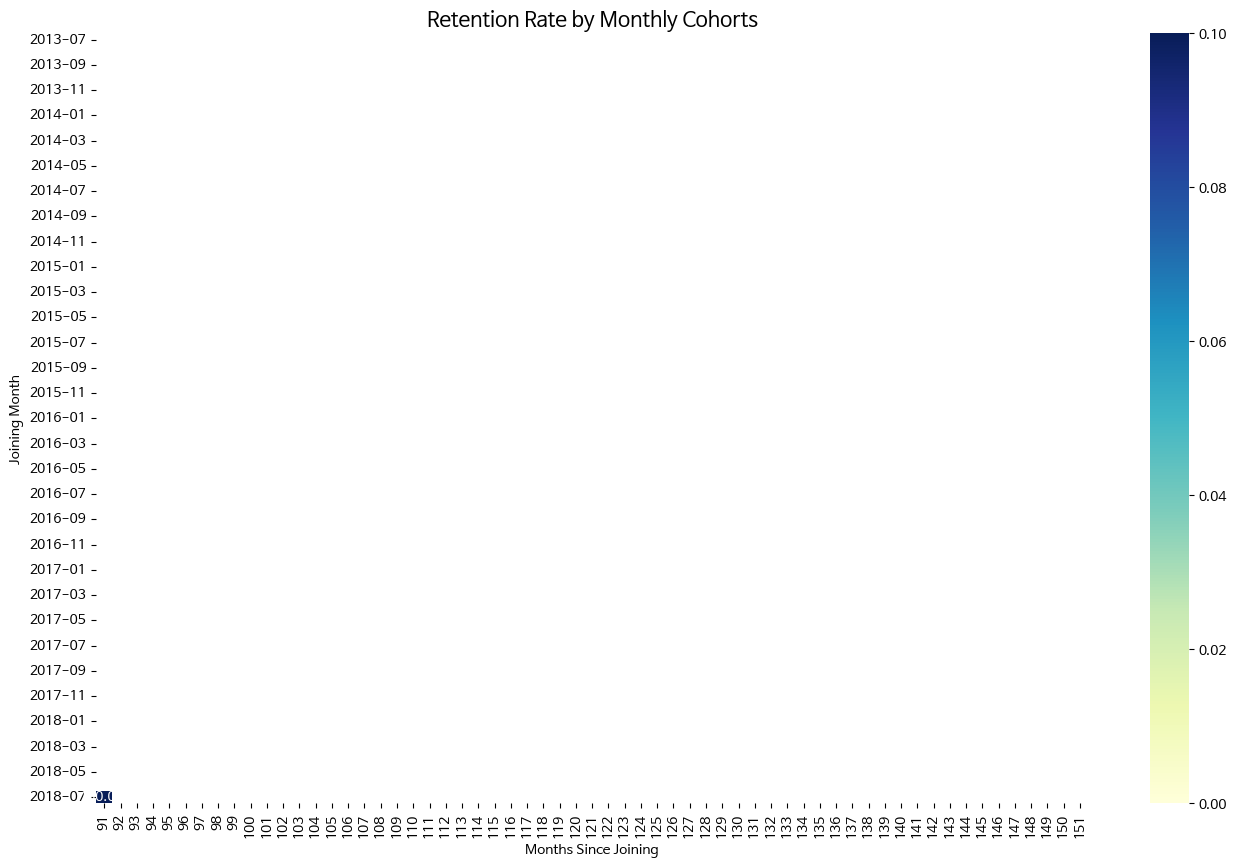

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. 코호트 인덱스(가입 후 경과 월) 계산
def get_month_diff(df, col1, col2):
    # col1: 활동 월, col2: 가입(코호트) 월
    y1, m1 = df[col1].dt.year, df[col1].dt.month
    y2, m2 = df[col2].dt.year, df[col2].dt.month
    return (y1 - y2) * 12 + (m1 - m2) + 1

df_log['CohortIndex'] = get_month_diff(df_log, 'OrderMonth', 'CohortMonth')

# 2. 코호트 매트릭스 생성 (고객 수 기준)
# 특정 월에 가입한 고객이 이후 달에 얼마나 활동(이벤트 발생)했는지 집계
cohort_data = df_log.groupby(['CohortMonth', 'CohortIndex'])['person'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='person')

# 3. 리텐션(유지율) 계산
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)

# 4. 히트맵 시각화
plt.figure(figsize=(16, 10))
plt.title('Retention Rate by Monthly Cohorts', fontsize=15)
sns.heatmap(retention, annot=True, fmt='.1%', cmap='YlGnBu', vmin=0, vmax=0.1)
plt.xlabel('Months Since Joining')
plt.ylabel('Joining Month')
plt.show()

In [15]:
import plotly.graph_objects as go

# 1. 이벤트별 고유 사용자 수 집계
# 이벤트 순서: 제안 수령 -> 제안 확인 -> 제안 완료 (트랜잭션 제외)
funnel_order = ['offer received', 'offer viewed', 'offer completed']
funnel_counts = df_log[df_log['event'].isin(funnel_order)]['event'].value_counts().reindex(funnel_order)

# 2. 퍼널 시각화
fig = go.Figure(go.Funnel(
    y = funnel_counts.index,
    x = funnel_counts.values,
    textinfo = "value+percent initial+percent previous",
    marker = {"color": ["#e6f2ff", "#99ccff", "#3399ff"]}
))

fig.update_layout(
    title='Starbucks Offer Journey Funnel',
    yaxis_title='Marketing Step'
)
fig.show()